# COMP 4447 Final Project
#### D'Aquila, Daniel
#### Perera, Janith
#### Sheffer, Grant 

In [17]:
# importing for df
import warnings

from pandas.core.common import SettingWithCopyWarning

warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

import pandas as pd
import numpy as np
aviation_df = pd.read_csv('AviationData.csv', encoding="ISO-8859-1")  # explain local grab
aviation_df

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.Flight,Air.Carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.Phase.of.Flight,Report.Status,Publication.Date
0,20181217X10943,Accident,GAA19CA098,2018-12-16,"Grangville, ID",United States,45.583611,-115.681667,PVT,NaN,...,Positioning,NaN,NaN,NaN,NaN,1.0,NaN,NaN,Preliminary,2018-12-18
1,20181217X25746,Accident,GAA19CA097,2018-12-15,"MORIARTY, NM",United States,34.970000,-106.000000,NaN,MORIARTY MUNI,...,Personal,NaN,NaN,NaN,NaN,1.0,VMC,NaN,Preliminary,2018-12-20
2,20181213X41114,Accident,ERA19LA065,2018-12-13,"Punta Gorda, FL",United States,26.925278,-82.001111,PGD,Punta Gorda,...,Personal,NaN,NaN,NaN,1.0,NaN,VMC,APPROACH,Preliminary,2018-12-21
3,20181213X45528,Accident,CEN19FA044,2018-12-13,"Valparaiso, IN",United States,41.451667,-87.004444,VPZ,Porter County Rgnl,...,Personal,NaN,1.0,NaN,NaN,NaN,VMC,TAKEOFF,Preliminary,2018-12-19
4,20181214X90303,Accident,GAA19CA096,2018-12-11,"Hartford, WI",United States,43.330278,-88.326111,HXF,Hartford Muni,...,Personal,NaN,NaN,NaN,NaN,1.0,VMC,NaN,Preliminary,2018-12-18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82630,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,NaN,VMC,APPROACH,Probable Cause,1980-04-16
82631,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,CRUISE,Probable Cause,2000-09-12
82632,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,CRUISE,Probable Cause,2007-02-26
82633,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,UNKNOWN,Probable Cause,1996-09-19


In the cell above, we are uploading a csv from Kaggle on aviation crashes into a dataframe called aviation_df. The dataframe contains 82,635 rows with 31 columns.  

### Data Cleaning 

Next, we will decide if each column in our dataframe will have a purpose for our analysis at all; are there too many nulls, too many blanks, or is the data not pertinant to our overall question.

In [18]:
# Count the number of Nulls in each column 
aviation_df.isna().sum()

Event.Id                      0
Investigation.Type            1
Accident.Number               0
Event.Date                    0
Location                     75
Country                     507
Latitude                  53903
Longitude                 53912
Airport.Code              35859
Airport.Name              33121
Injury.Severity               0
Aircraft.Damage            2592
Aircraft.Category         56735
Registration.Number        3582
Make                         73
Model                       102
Amateur.Built               627
Number.of.Engines          4609
Engine.Type                3982
FAR.Description           57068
Schedule                  70905
Purpose.of.Flight          4550
Air.Carrier               78545
Total.Fatal.Injuries      25967
Total.Serious.Injuries    28466
Total.Minor.Injuries      27288
Total.Uninjured           13795
Weather.Condition          2708
Broad.Phase.of.Flight      6503
Report.Status                 0
Publication.Date          14014
dtype: i

In [19]:
# Columns that we've identified as not being useful for our project
drops = ['Investigation.Type', 'Airport.Code', 'Airport.Name',
         'Engine.Type', 'FAR.Description', 'Schedule',
         'Air.Carrier', 'Total.Fatal.Injuries', 'Total.Serious.Injuries',
         'Total.Minor.Injuries', 'Total.Uninjured', 'Report.Status',
         'Publication.Date']
aviation_df.drop(columns=drops, inplace=True)  # dropping columns we agreed upon

In [20]:
aviation_df['Country'].value_counts()

United States     77528
Canada              286
Brazil              266
Mexico              248
United Kingdom      247
                  ...  
Senegal               1
Isle of Man           1
Cambodia              1
Nauru                 1
Oman                  1
Name: Country, Length: 178, dtype: int64

In order to refine our data further we decided to only focus on crashes that occurred in the United States as crashed in the United States account for approximately 94% of all crashed documented.

In [21]:
aviation_df.drop(aviation_df[aviation_df['Country'] != 'United States'].index, inplace=True)  # 80132/85976 entries are US


In [22]:
# Renaming the columns to be more conventional:
aviation_df = aviation_df.rename(columns={"Event.Id":"Event_ID", "Accident.Number":"Accident_Number",
                                          "Event.Date":"Event_Date", "Injury.Severity":"Injury_Severity",
                                          "Aircraft.Damage":"Aircraft_Damage", "Aircraft.Category":"Aircraft_Category",
                                          "Registration.Number":"Registration_Number", "Amateur.Built":"Amateur_Built",
                                          "Number.of.Engines":"Number_Engines", "Purpose.of.Flight":"Purpose_Flight",
                                          "Weather.Condition":"Weather_Condition", "Broad.Phase.of.Flight":"Broad_Phase_Flight"})
aviation_df.dtypes

Event_ID                object
Accident_Number         object
Event_Date              object
Location                object
Country                 object
Latitude               float64
Longitude              float64
Injury_Severity         object
Aircraft_Damage         object
Aircraft_Category       object
Registration_Number     object
Make                    object
Model                   object
Amateur_Built           object
Number_Engines         float64
Purpose_Flight          object
Weather_Condition       object
Broad_Phase_Flight      object
dtype: object

#### Data conversion 

In [23]:
aviation_df['Event_Date'] = pd.to_datetime(aviation_df['Event_Date']) #Converting all date fields to datetime in the dataframe
aviation_df.dtypes

Event_ID                       object
Accident_Number                object
Event_Date             datetime64[ns]
Location                       object
Country                        object
Latitude                      float64
Longitude                     float64
Injury_Severity                object
Aircraft_Damage                object
Aircraft_Category              object
Registration_Number            object
Make                           object
Model                          object
Amateur_Built                  object
Number_Engines                float64
Purpose_Flight                 object
Weather_Condition              object
Broad_Phase_Flight             object
dtype: object

Reducing our dataset even further by select fewer columns to continue our analysis.

We will then fully clean the small dataframe we are left with of NULLS/Nans and removing data that is incorrect (ie, latitudes and longitudes outside of US area but identified as being in the US in terms of country location).

In [24]:
# Columns we opted to keep for analysis
keeps = ['Event_ID','Accident_Number', 'Event_Date', 'Location', 'Latitude',
         'Longitude', 'Amateur_Built', 'Weather_Condition']

small_df = aviation_df[keeps]

# dropping NAs for Location (30), Amateur Built (95), Weather Condition (608)
small_df.dropna(subset=['Location', 'Amateur_Built', 
                      'Weather_Condition'], inplace=True)
# dropping UNK/Unk (Unknown) weather condition (638/79431)
small_df.drop(small_df[small_df['Weather_Condition'] == 'UNK'].index, inplace=True)
small_df.drop(small_df[small_df['Weather_Condition'] == 'Unk'].index, inplace=True)

small_df.head()

,Event_ID,Accident_Number,Event_Date,Location,Latitude,Longitude,Amateur_Built,Weather_Condition
1,20181217X25746,GAA19CA097,2018-12-15,"MORIARTY, NM",34.970000,-106.000000,No,VMC
2,20181213X41114,ERA19LA065,2018-12-13,"Punta Gorda, FL",26.925278,-82.001111,No,VMC
3,20181213X45528,CEN19FA044,2018-12-13,"Valparaiso, IN",41.451667,-87.004444,No,VMC
4,20181214X90303,GAA19CA096,2018-12-11,"Hartford, WI",43.330278,-88.326111,No,VMC
6,20181208X53536,GAA19CA090,2018-12-08,"Hesperia, CA",34.376945,-117.316111,Yes,VMC


In [25]:
# removing invalid latitude and longitude values AND 1 based on Location
small_df.drop(small_df[small_df['Latitude'] < -90].index, inplace=True)
small_df.drop(small_df[small_df['Latitude'] > 90].index, inplace=True)
small_df.drop(small_df[small_df['Longitude'] < -180].index, inplace=True)
small_df.drop(small_df[small_df['Longitude'] > 180].index, inplace=True)

The following cell will create two new columns from existing columns in the dataframe: State_Code and Year. 

In [26]:
# deduced columns
small_df['Year'] = pd.DatetimeIndex(small_df['Event_Date']).year  # extracting year field

def code_strip(row):  # extracts the state [or territory] tag
    slice = row['Location'][-4:]
    if slice[0] == ',':
        return slice[-2:]
    else:  # single unique case for 'GULF OF MEXICO,' entry
        return 'GM'
    
small_df['State_Code'] = small_df.apply(lambda row: code_strip(row), axis=1)

# trimming down to the 50 states and DC
states = ["AL", "AK", "AZ", "AR", "CA", "CO", "CT", "DC", "DE", "FL", "GA", 
          "HI", "ID", "IL", "IN", "IA", "KS", "KY", "LA", "ME", "MD", 
          "MA", "MI", "MN", "MS", "MO", "MT", "NE", "NV", "NH", "NJ", 
          "NM", "NY", "NC", "ND", "OH", "OK", "OR", "PA", "RI", "SC", 
          "SD", "TN", "TX", "UT", "VT", "VA", "WA", "WV", "WI", "WY"]

small_df = small_df[small_df['State_Code'].isin(states)]

small_df.drop(small_df[small_df['Year'] < 1982].index, inplace=True)  # only 7 entries before 1982...

small_df.head()

,Event_ID,Accident_Number,Event_Date,Location,Latitude,Longitude,Amateur_Built,Weather_Condition,Year,State_Code
1,20181217X25746,GAA19CA097,2018-12-15,"MORIARTY, NM",34.970000,-106.000000,No,VMC,2018,NM
2,20181213X41114,ERA19LA065,2018-12-13,"Punta Gorda, FL",26.925278,-82.001111,No,VMC,2018,FL
3,20181213X45528,CEN19FA044,2018-12-13,"Valparaiso, IN",41.451667,-87.004444,No,VMC,2018,IN
4,20181214X90303,GAA19CA096,2018-12-11,"Hartford, WI",43.330278,-88.326111,No,VMC,2018,WI
6,20181208X53536,GAA19CA090,2018-12-08,"Hesperia, CA",34.376945,-117.316111,Yes,VMC,2018,CA


## Visual Analysis of Data


Our data is now cleaned and refined to the columns and format we need to perform our analysis of aircraft crashes by location in the United States.

In [27]:
# importing for heatmap
import folium
from folium.plugins import HeatMap  # creating HeatMap object
import webbrowser  # to open .html file if saved
import os  # to find cwd

In [28]:
# HEATMAP
latlon_df = small_df[['Latitude', 'Longitude', 'Year']]
latlon_df = latlon_df.drop(latlon_df[latlon_df['Year'] < 1999].index)  # 2000-present
latlon_df = latlon_df.dropna(subset=['Latitude', 'Longitude'])  # Lat (50133), Long (50143)

latitude_avg = latlon_df['Latitude'].mean()
longitude_avg = latlon_df['Longitude'].mean()
heat_map = folium.Map([latitude_avg, longitude_avg], zoom_start=2)
title = 'Aircraft Accidents in the United States'
html = ''' <h3 align="center" style="font-size:16px"><b>{}</b></h3>
       '''.format(title)
heat_map.get_root().html.add_child(folium.Element(html))

# adding heatmap data
coord_data = [[row['Latitude'], row['Longitude']] for idx, row in latlon_df.iterrows()]
HeatMap(coord_data).add_to(heat_map)

# saving to .html and opening in browser
file_name = 'Accidents_Heat.html'
heat_map.save(file_name)
abs_path = os.path.abspath(os.getcwd())
url = f'file:///{abs_path}/{file_name}'
webbrowser.open(url, new=1, autoraise=True)

True

Discuss why we opted for the choropleth map of the US states instead

Unless you view at an individual state level the heatmap becomes too confusing as well as some of the states appear to be geolacated in the middle of the atlantic so #wrong

In [29]:
# importing for choropleth
import geopandas as gpd  # reading json of state geometry
from geojson import Feature, FeatureCollection  # creating hovering interaction on the states

In [30]:
# CHOROPLETH
count_df = pd.DataFrame({'Accidents': small_df.groupby(["State_Code"]).size()}).reset_index()
url = "https://raw.githubusercontent.com/python-visualization/folium/master/examples/data"
state_geo = f"{url}/us-states.json"
geoJSON_df = gpd.read_file(state_geo)
geoJSON_df = geoJSON_df.rename(columns = {'id': 'State_Code'})
choro_df = geoJSON_df.merge(count_df, on='State_Code')
choro_df = choro_df.rename({'State_Code': 'state'}, axis=1)

accident_map = folium.Map(location=[50, -100], zoom_start=4)
title = 'Aircraft Accidents in the United States'
html = ''' <h3 align="center" style="font-size:16px"><b>{}</b></h3>
       '''.format(title)
accident_map.get_root().html.add_child(folium.Element(html))

# adding choropleth data
folium.Choropleth(geo_data=choro_df,
                  data=choro_df,
                  columns=['state', 'Accidents'],
                  key_on="feature.properties.state",
                  fill_color='YlOrRd',
                  fill_opacity=1,
                  nan_fill_color="White",
                  line_opacity=1,
                  legend_name="Number of Accidents [from 1982-2021]",
                  smooth_factor=0,
                  Highlight= True,
                  line_color="#0000",
                  name='Accident Count',
                  show=True,
                  overlay=True).add_to(accident_map)

# hover functionality for state level granularity
style_function = lambda x: {'fillColor': '#ffffff', 
                            'color':'#000000', 
                            'fillOpacity': 0.1, 
                            'weight': 0.1}
highlight_function = lambda x: {'fillColor': '#000000', 
                                'color':'#000000', 
                                'fillOpacity': 0.50, 
                                'weight': 0.1}
NIL = folium.features.GeoJson(
    data=choro_df,
    style_function=style_function, 
    control=False,
    highlight_function=highlight_function, 
    tooltip=folium.features.GeoJsonTooltip(
        fields=['state', 'Accidents'],
        aliases=['State:', 'Count:'],
        style=("background-color: white; color: #333333; font-family: arial; font-size: 12px; padding: 10px;") 
    )
)
accident_map.add_child(NIL)
accident_map.keep_in_front(NIL)

# saving to .html and opening in browser
file_name = 'Accidents_Choro.html'
accident_map.save(file_name)
abs_path = os.path.abspath(os.getcwd())
url = f'file:///{abs_path}/{file_name}'
webbrowser.open(url, new=1, autoraise=True)

True

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.cbook import boxplot_stats
sns.set(style='darkgrid')

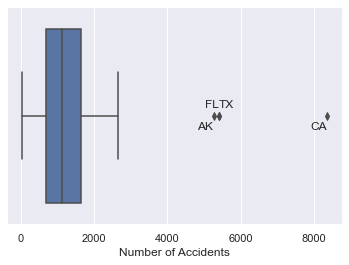

In [32]:
### BOX & WHISKER
ax = sns.boxplot(x=count_df['Accidents'])

# manual calculation of quantiles for labeling purposes
month_q1 = count_df.quantile(0.25)['Accidents']
month_q3 = count_df.quantile(0.75)['Accidents']
outlier_top_lim = month_q3 + 1.5 * (month_q3 - month_q1)
outlier_bottom_lim = month_q1 - 1.5 * (month_q3 - month_q1)
ax.set(xlabel='Number of Accidents', ylabel='',
       title='')

# iterating through df to label the outliers
for row in count_df.itertuples():
    val = row[2]
    if val > outlier_top_lim or val < outlier_bottom_lim:
        if row[1] in ['AK', 'CA']:
            x = val
            y = 0.05
        else:
            if row[1] == 'TX':
                x = val + 400
            else:
                x = val
            y = -0.05
        plt.text(x, y, row[1], ha='right', va='center')
plt.show()

In [33]:
# creation of outliers column
def outlier_detection(row, num_call):
    outliers = ['AK', 'FL', 'TX', 'CA']
    if row['State_Code'] in outliers:
        if num_call == 0:
            return 'Outlier'
        else:
            return 1
    else:
        if num_call == 0:
            return 'Non-Outlier'
        else:
            return 1
small_df['Outliers'] = small_df.apply(lambda row: outlier_detection(row, 0), axis=1)
small_df.head()

,Event_ID,Accident_Number,Event_Date,Location,Latitude,Longitude,Amateur_Built,Weather_Condition,Year,State_Code,Outliers
1,20181217X25746,GAA19CA097,2018-12-15,"MORIARTY, NM",34.970000,-106.000000,No,VMC,2018,NM,Non-Outlier
2,20181213X41114,ERA19LA065,2018-12-13,"Punta Gorda, FL",26.925278,-82.001111,No,VMC,2018,FL,Outlier
3,20181213X45528,CEN19FA044,2018-12-13,"Valparaiso, IN",41.451667,-87.004444,No,VMC,2018,IN,Non-Outlier
4,20181214X90303,GAA19CA096,2018-12-11,"Hartford, WI",43.330278,-88.326111,No,VMC,2018,WI,Non-Outlier
6,20181208X53536,GAA19CA090,2018-12-08,"Hesperia, CA",34.376945,-117.316111,Yes,VMC,2018,CA,Outlier


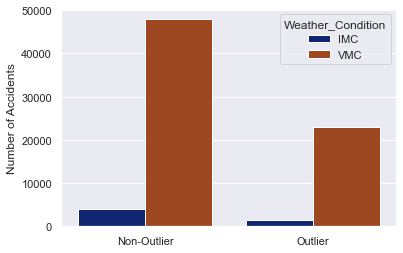

In [34]:
# OUTLIERS VS NON-OUTLIERS (WEATHER CONDITIONS)
weather_df = small_df[['Outliers', 'Weather_Condition']]
weather_df = weather_df.groupby(['Outliers', 'Weather_Condition']).size().reset_index(name='Count')
ax1 = sns.barplot(data=weather_df,
                  x='Outliers',
                  y='Count',
                  hue='Weather_Condition',
                  palette='dark')
ax1.set(xlabel='', ylabel='Number of Accidents',
        title='')
plt.show()

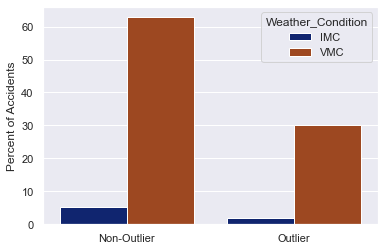

In [35]:
# OUTLIERS VS NON-OUTLIERS (WEATHER CONDITIONS)
weather_df['Whole_Percent'] = (weather_df['Count'] / 
                  weather_df['Count'].sum()) * 100

ax1 = sns.barplot(data=weather_df,
                  x='Outliers',
                  y='Whole_Percent',
                  hue='Weather_Condition',
                  palette='dark')
ax1.set(xlabel='', ylabel='Percent of Accidents',
        title='')
plt.show()


In [36]:
Non_Out_IMC = weather_df.iloc[0, 2] / (weather_df.iloc[0, 2] + weather_df.iloc[1, 2]) * 100
Out_IMC = weather_df.iloc[2, 2] / (weather_df.iloc[2, 2] + weather_df.iloc[3, 2]) * 100
Non_Out_VMC = 100.0 - Non_Out_IMC
Out_VMC = 100.0 - Out_IMC
Percentages = [Non_Out_IMC, Non_Out_VMC, Out_IMC, Out_VMC]
Percentages = [round(val, 2) for val in Percentages]
weather_df['Grouped_Percent'] = Percentages
weather_df.head()

,Outliers,Weather_Condition,Count,Whole_Percent,Grouped_Percent
0,Non-Outlier,IMC,3901,5.116804,7.53
1,Non-Outlier,VMC,47915,62.848411,92.47
2,Outlier,IMC,1496,1.962250,6.13
3,Outlier,VMC,22927,30.072535,93.87


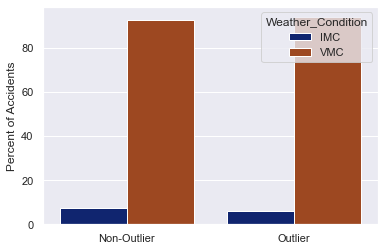

In [37]:
ax1 = sns.barplot(data=weather_df,
                  x='Outliers',
                  y='Grouped_Percent',
                  hue='Weather_Condition',
                  palette='dark')
ax1.set(xlabel='', ylabel='Percent of Accidents',
        title='')
plt.show()

Find the percent per group based on weather condition and number of accidents. Discuss here

IMC = Instrument Meterolgical Conditions

VMC = Visual Meterlogical Conditions 

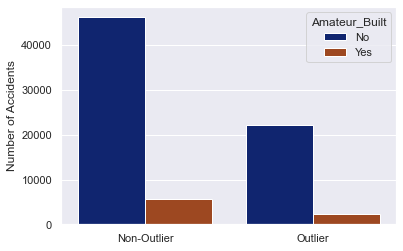

In [38]:
# OUTLIERS VS NON-OUTLIERS (AMATEUR BUILT)
amateur_df = small_df[['Outliers', 'Amateur_Built']]
amateur_df = amateur_df.groupby(['Outliers', 'Amateur_Built']).size().reset_index(name='Count')
ax1 = sns.barplot(data=amateur_df,
                  x='Outliers',
                  y='Count',
                  hue='Amateur_Built',
                  palette='dark')
ax1.set(xlabel='', ylabel='Number of Accidents',
        title='')
plt.show()

In [39]:
Non_Out_No = amateur_df.iloc[0, 2] / (amateur_df.iloc[0, 2] + amateur_df.iloc[1, 2]) * 100
Out_No = amateur_df.iloc[2, 2] / (amateur_df.iloc[2, 2] + amateur_df.iloc[3, 2]) * 100
Non_Out_Yes = 100.0 - Non_Out_No
Out_Yes = 100.0 - Out_No
Percentages = [Non_Out_No, Non_Out_Yes, Out_No, Out_Yes]
Percentages = [round(val, 2) for val in Percentages]
amateur_df['Percent'] = Percentages
amateur_df.head()

,Outliers,Amateur_Built,Count,Percent
0,Non-Outlier,No,46232,89.22
1,Non-Outlier,Yes,5584,10.78
2,Outlier,No,22163,90.75
3,Outlier,Yes,2260,9.25


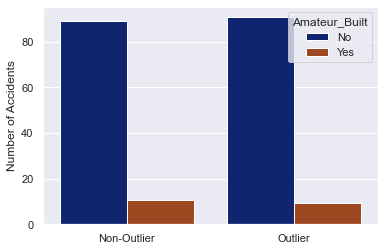

In [40]:
ax1 = sns.barplot(data=amateur_df,
                  x='Outliers',
                  y='Percent',
                  hue='Amateur_Built',
                  palette='dark')
ax1.set(xlabel='', ylabel='Number of Accidents',
        title='')
plt.show()

Discuss how we do not believe that the amateur built column plays a role in determining if an aircraft crashed. 

In [41]:
import pyproj
from shapely.geometry import Polygon, Point
from shapely.ops import transform
from functools import partial

In [42]:
# BERMUDA SQAURE (JUST GOOFIN)
poly = Polygon(([-80.190262, 25.774252], [-66.118292, 18.466465], [-64.75737, 32.321384]))  # bermuda triangle geometry
def bermuda(row, shape):
    coord = Point(row['Latitude'], row['Longitude'])
    return shape.contains(coord)  # check if the given point is within the triangle
small_df['Bermuda'] = small_df.apply(lambda row: bermuda(row, poly), axis=1)
small_df['Bermuda'].value_counts()  # zero crashes in the bermuda triangle :(


False    76239
Name: Bermuda, dtype: int64